<a href="https://colab.research.google.com/github/shipra-saxena/miniature-potato/blob/master/musk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important liberary imports

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense , Activation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
from keras.optimizers import SGD,RMSprop

Reading and understanding data

In [0]:
df=pd.read_csv('musk_csv.csv')

In [3]:
df.shape

(6598, 170)

In [4]:
df.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [5]:
df.groupby('class').agg('count') #understanding class distribution of data


,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f127,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,...,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581,5581
1,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,...,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017,1017


In [6]:
df.isna().count()   #looking for any missing value but no missing values found

ID                   6598
molecule_name        6598
conformation_name    6598
f1                   6598
f2                   6598
                     ... 
f163                 6598
f164                 6598
f165                 6598
f166                 6598
class                6598
Length: 170, dtype: int64

Removing unwanted columns

In [0]:
df=df.drop(['ID',	'molecule_name',	'conformation_name'	],axis=1)

In [8]:
df.shape

(6598, 167)

In [9]:
df.head

<bound method NDFrame.head of       f1   f2   f3   f4   f5   f6  ...  f162  f163  f164  f165  f166  class
0     46 -108  -60  -69 -117   49  ...   126   156   -50  -112    96      1
1     41 -188 -145   22 -117   -6  ...   136   169   -61  -136    79      1
2     46 -194 -145   28 -117   73  ...   142   165   -67  -145    39      1
3     41 -188 -145   22 -117   -7  ...   136   168   -60  -135    80      1
4     41 -188 -145   22 -117   -7  ...   137   168   -60  -135    80      1
...   ..  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
6593  51 -123  -23 -108 -117  134  ...   107   171   -44  -115   118      0
6594  44 -104  -19 -105 -117  142  ...   129   158   -66  -144    -5      0
6595  44 -102  -19 -104 -117   72  ...   130   159   -66  -144    -6      0
6596  51 -121  -23 -106 -117   63  ...   106   171   -44  -116   117      0
6597  51 -122  -23 -106 -117  190  ...   107   171   -44  -115   118      0

[6598 rows x 167 columns]>

Dividing data in 80:20 train test split

In [0]:

train,test=train_test_split(df,test_size=0.2)

In [10]:
train.shape

(5278, 167)

Seperating labels from features

In [0]:
train_label=train['class']
test_label=test['class']

In [0]:
train=train.drop(['class'],axis=1)
test=test.drop(['class'],axis=1)

In [13]:
train.shape

(5278, 166)

Normalizing data i.e scale data in range of 0 to 1

In [0]:

train = pd.DataFrame(preprocessing.normalize(train, norm='l2'))
test=pd.DataFrame(preprocessing.normalize(test,norm='l2'))


In [16]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165
0,0.027556,-0.064697,-0.035943,-0.067692,-0.070088,-0.079074,0.022764,-0.096446,-0.004792,-0.013778,-0.163540,-0.131790,-0.047325,-0.179115,-0.170728,-0.183308,-0.018570,-0.063499,-0.135983,-0.119210,-0.035344,-0.013179,-0.040136,0.073683,0.014377,0.010184,-0.016174,-0.053315,-0.058706,0.042532,-0.069489,0.074282,-0.064098,0.008986,-0.071886,0.037740,-0.104833,0.024561,-0.016174,0.040735,...,0.025160,0.037141,0.007189,-0.112022,0.026957,-0.070687,-0.044928,-0.109026,-0.140776,-0.010783,0.007189,-0.007788,-0.024561,-0.071886,-0.089258,0.041933,0.010783,-0.011382,-0.106031,-0.061103,-0.069489,-0.008387,-0.029952,0.014377,-0.048523,-0.074881,-0.068291,-0.026358,0.077277,0.001797,-0.145568,-0.052716,-0.080272,-0.004193,0.023363,0.075480,0.093451,-0.029952,-0.067692,0.057508
1,0.022892,-0.076660,0.016503,-0.042057,-0.062286,0.040992,-0.079322,-0.061754,-0.124041,0.000000,-0.096890,-0.116055,-0.041524,-0.102214,-0.064948,-0.158112,-0.113926,-0.130429,-0.070804,-0.004259,-0.142141,-0.096890,-0.122976,0.104343,0.043654,-0.125638,0.023424,-0.085178,-0.017568,0.052704,-0.062286,-0.048445,-0.009583,-0.019165,-0.083049,0.077193,-0.088372,0.023424,-0.017036,0.050574,...,-0.013841,0.034071,-0.019697,-0.100084,-0.046848,-0.059092,-0.145335,-0.138414,-0.094761,0.028748,-0.029280,-0.024489,-0.122976,-0.109667,-0.115523,0.042057,-0.012777,-0.058028,-0.094761,-0.054833,-0.065481,0.046316,0.026086,0.044719,-0.053769,-0.066013,-0.059625,-0.022359,-0.021827,-0.026086,-0.124573,-0.162903,0.026086,-0.017036,0.078257,0.067078,0.086243,-0.035136,-0.078257,-0.004791
2,0.019186,-0.107444,-0.060848,-0.030698,-0.064137,0.029054,0.014253,-0.056463,-0.011512,0.003837,-0.168292,-0.117311,-0.058656,-0.155136,-0.155136,-0.165003,-0.030698,-0.041662,-0.104703,-0.025216,-0.033987,-0.008223,-0.023572,0.103058,0.043855,0.012608,-0.010415,-0.072908,-0.035084,0.057011,0.141431,0.067975,-0.012060,0.001645,-0.075101,0.015897,-0.089354,0.040017,-0.079487,0.038373,...,-0.013156,0.043855,-0.058656,-0.102510,-0.001645,-0.074553,-0.035632,-0.090450,-0.112926,-0.010964,0.025216,-0.063589,-0.001645,-0.018090,-0.052077,0.041662,0.043306,0.032891,-0.097577,-0.056463,-0.065782,-0.018638,-0.055915,0.021927,-0.054270,-0.069071,-0.061945,-0.083324,0.006578,-0.043306,-0.131016,-0.166099,0.030150,-0.071264,0.001645,0.011512,0.219273,0.079487,0.003837,-0.204472
3,0.026506,-0.109409,-0.081774,-0.042861,-0.065984,0.005640,0.032146,-0.094746,-0.022558,-0.013535,-0.163549,-0.063164,-0.039477,-0.155090,-0.160165,-0.170317,0.029890,-0.084594,-0.056396,-0.102641,-0.015791,-0.012407,0.001128,0.056396,0.062600,-0.019175,0.026506,-0.050193,0.014663,0.038913,-0.065420,-0.011279,-0.034402,0.007895,-0.074443,0.181032,-0.098693,0.002256,-0.081774,0.021431,...,0.023122,0.032710,0.007895,-0.087414,-0.007895,0.054140,-0.041169,-0.071059,-0.122944,-0.051885,0.029890,-0.043425,-0.011279,-0.019739,-0.015791,0.002820,0.027634,0.009023,-0.100385,-0.058088,-0.067675,-0.036658,-0.045117,0.029326,-0.063728,-0.068239,-0.063164,-0.095310,-0.009023,-0.106025,-0.134223,-0.043425,-0.073315,-0.072751,-0.016355,0.116740,0.156781,0.023122,0.040605,0.149450
4,0.025903,-0.087951,0.020482,-0.015060,-0.070481,-0.090360,-0.086144,0.007831,-0.138553,-0.024699,-0.023494,-0.048192,-0.048192,-0.059035,-0.066867,-0.146986,-0.127709,-0.086746,-0.001807,-0.021084,-0.123493,-0.107830,-0.109035,0.162046,0.158432,-0.119276,0.027108,-0.087348,-0.028313,0.086746,-0.070481,-0.055421,-0.010241,-0.066867,-0.093975,0.087348,-0.105420,0.025903,-0.018674,0.057228,...,-0.054216,-0.023494,-0.069276,-0.112649,-0.051807,-0.065662,-0.136745,-0.084939,-0.051204,0.033132,-0.036747,-0.028313,-0.116264,-0.042168,-0.045783,0.047590,-0.017470,-0.067469,-0.101204,-0.036144,0.034939

Deep learning solution Using MLPClassifier 

In [67]:
from sklearn.neural_network import MLPClassifier
num_epoch=10
train_score=[]
 
mlp = MLPClassifier(hidden_layer_sizes=(10,10),solver='sgd',activation='relu',
                      learning_rate_init=0.01,max_iter=500,validation_fraction=0.2,early_stopping=True,)

mlp.fit(train,train_label)
 

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.01, max_fun=15000, max_iter=500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.2, verbose=False,
              warm_start=False)

In [0]:
y_pred=mlp.predict(test)

Deep learning solution using Sequential MLP model of keras

In [0]:
model=Sequential()
model.add(Dense(20,input_dim=(166),activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1,activation='sigmoid'))




In [0]:
opt=RMSprop(lr=0.01)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [129]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 20)                3340      
_________________________________________________________________
dense_52 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_53 (Dense)             (None, 20)                220       
_________________________________________________________________
dense_54 (Dense)             (None, 1)                 21        
Total params: 3,791
Trainable params: 3,791
Non-trainable params: 0
_________________________________________________________________


Training the model with 80% training and 20% validation

In [130]:
history=model.fit(train,train_label,epochs=25,batch_size=100,validation_split=0.2)

Train on 4222 samples, validate on 1056 samples
Epoch 1/25
4222/4222 [==============================] - 1s 262us/step - loss: 0.3668 - acc: 0.8392 - val_loss: 0.3723 - val_acc: 0.8513
Epoch 2/25
4222/4222 [==============================] - 0s 21us/step - loss: 0.2519 - acc: 0.9053 - val_loss: 0.2188 - val_acc: 0.9261
Epoch 3/25
4222/4222 [==============================] - 0s 21us/step - loss: 0.1954 - acc: 0.9275 - val_loss: 0.2368 - val_acc: 0.9214
Epoch 4/25
4222/4222 [==============================] - 0s 21us/step - loss: 0.1724 - acc: 0.9363 - val_loss: 0.1709 - val_acc: 0.9261
Epoch 5/25
4222/4222 [==============================] - 0s 20us/step - loss: 0.1474 - acc: 0.9420 - val_loss: 0.5056 - val_acc: 0.8750
Epoch 6/25
4222/4222 [==============================] - 0s 20us/step - loss: 0.1357 - acc: 0.9510 - val_loss: 0.1470 - val_acc: 0.9366
Epoch 7/25
4222/4222 [==============================] - 0s 22us/step - loss: 0.1164 - acc: 0.9538 - val_loss: 0.3858 - val_acc: 0.8390
Epoch 

Plotting train validation loss

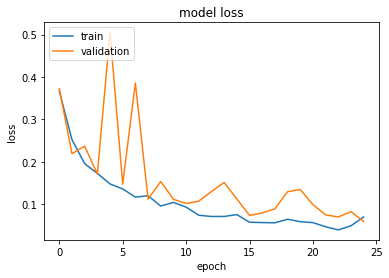

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

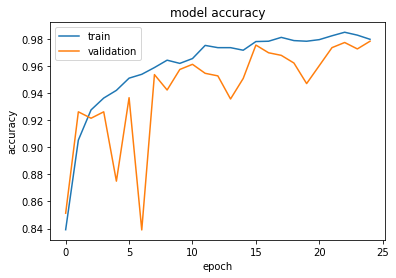

In [132]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Using trained model to predict test data

In [0]:


y_pred=model.predict_classes(test)
y_pred=y_pred[:,0]


calculating accuracy_score

In [134]:
accuracy = accuracy_score(test_label, y_pred)
print('Accuracy: %f' % accuracy)

Accuracy: 0.986364


calculating precision

In [135]:
precision = precision_score(test_label, y_pred)
print('Precision: %f' % precision)

Precision: 0.989529


calculating Recall

In [136]:
recall = recall_score(test_label, y_pred)
print('Recall: %f' % recall)

Recall: 0.921951


calculating f1 score

In [137]:
f1 = f1_score(test_label, y_pred)
print('F1 score: %f' % f1)

F1 score: 0.954545


confusion matrix

In [138]:
matrix = confusion_matrix(test_label, y_pred)
print(matrix)

[[1113    2]
 [  16  189]]


saving the model in h5

In [0]:
model.save("model.h5")

In [140]:
score = model.evaluate(test,test_label, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

acc: 98.64%
